✅ Total images found: 8

✅ 5 Random Samples (path, label):
('../images_dataSAT/class_0_non_agri/city1.jpeg', 0)
('../images_dataSAT/class_0_non_agri/city4.jpg', 0)
('../images_dataSAT/class_1_agri/farm4.jpeg', 1)
('../images_dataSAT/class_1_agri/farm2.jpeg', 1)
('../images_dataSAT/class_1_agri/farm3.jpeg', 1)
Found 8 images belonging to 2 classes.

✅ Training batch shape: (8, 64, 64, 3)
Labels batch shape: (8, 2)


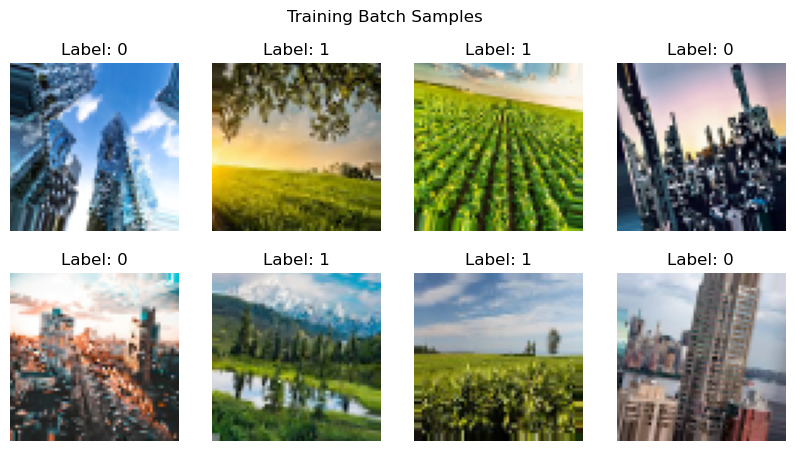

Found 0 images belonging to 2 classes.

✅ Validation batch shape: (0, 64, 64, 3)
Labels batch shape: (0, 2)


<Figure size 1000x500 with 0 Axes>

In [3]:
# =============================================
# QUESTION 2 — DATA LOADING AND AUGMENTATION USING KERAS
# =============================================

import os, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ------------------------------------------------------------
# SETUP PATHS
# ------------------------------------------------------------
dataset_dir = '../images_dataSAT'   # use './images_dataSAT' if notebook is in root
class_non = os.path.join(dataset_dir, 'class_0_non_agri')
class_agri = os.path.join(dataset_dir, 'class_1_agri')

valid_exts = ('.jpg', '.jpeg', '.png')

# ------------------------------------------------------------
# TASK 1: Create list of all image paths from both folders
# ------------------------------------------------------------
non_paths = [os.path.join(class_non, f) for f in os.listdir(class_non)
             if f.lower().endswith(valid_exts)]
agri_paths = [os.path.join(class_agri, f) for f in os.listdir(class_agri)
              if f.lower().endswith(valid_exts)]

all_image_paths = non_paths + agri_paths
print("✅ Total images found:", len(all_image_paths))

# ------------------------------------------------------------
# TASK 2: Create temporary list binding image paths and labels
# ------------------------------------------------------------
temp = [(p, 0 if 'class_0' in p else 1) for p in all_image_paths]
print("\n✅ 5 Random Samples (path, label):")
for pair in random.sample(temp, min(5, len(temp))):
    print(pair)

# ------------------------------------------------------------
# TASK 3: Generate a data batch using Keras ImageDataGenerator
# ------------------------------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,       # 80-20 split
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=8,
    subset='training'
)

# Fetch one training batch
x_batch, y_batch = next(train_gen)
print("\n✅ Training batch shape:", x_batch.shape)
print("Labels batch shape:", y_batch.shape)

# Display first 8 images with labels
plt.figure(figsize=(10, 5))
for i in range(len(x_batch)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.title(f"Label: {np.argmax(y_batch[i])}")   # fixed line
plt.suptitle("Training Batch Samples")
plt.show()

# ------------------------------------------------------------
# TASK 4: Create validation data using batch size = 8
# ------------------------------------------------------------
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=8,
    subset='validation'
)

x_val, y_val = next(val_gen)
print("\n✅ Validation batch shape:", x_val.shape)
print("Labels batch shape:", y_val.shape)

# Display validation images
plt.figure(figsize=(10, 5))
for i in range(len(x_val)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_val[i])
    plt.axis('off')
    plt.title(f"Val Label: {np.argmax(y_val[i])}")
plt.suptitle("Validation Batch Samples")
plt.show()
